<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Calendar Spread Research

This notebook looks at how wide the typical spread is between different CL contracts.

First, load the last 30 days of prices. For the `BID_ASK` bar type, the `Open` field contains the average bid and the `Close` field contains the average ask:

In [1]:
from quantrocket import get_prices
import pandas as pd

start_date = pd.Timestamp.today() - pd.Timedelta(days=30)

prices = get_prices("cl-1min-bbo", universes="cl-fut", start_date=start_date, fields=["Open","Close"])
bids = prices.loc["Open"]
asks = prices.loc["Close"]
midpoints = (bids+asks) / 2

Using a DataFrame of prices, we can use the function `get_contract_nums_reindexed_like` to obtain a similarly indexed DataFrame showing each contract's numerical sequence in the contract chain as of any given date. Using the `limit` parameter, we ask the function to sequence the next 15 contracts.

In [2]:
from quantrocket.master import get_contract_nums_reindexed_like

limit = 15

contract_nums = get_contract_nums_reindexed_like(midpoints, limit=limit)
contract_nums.tail()

ConId                81093789   97589583   97589608   117170265  138979250  \
Date       Time                                                              
2019-09-06 23:55:00        3.0       15.0        9.0        NaN        1.0   
           23:56:00        3.0       15.0        9.0        NaN        1.0   
           23:57:00        3.0       15.0        9.0        NaN        1.0   
           23:58:00        3.0       15.0        9.0        NaN        1.0   
           23:59:00        3.0       15.0        9.0        NaN        1.0   

ConId                138979281  174230593  174230603  174230606  174230608  \
Date       Time                                                              
2019-09-06 23:55:00        2.0        4.0        8.0       14.0       13.0   
           23:56:00        2.0        4.0        8.0       14.0       13.0   
           23:57:00        2.0        4.0        8.0       14.0       13.0   
           23:58:00        2.0        4.0        8.0       14.0       13.0   
           23:59:00        2.0        4.0        8.0       14.0       13.0   

ConId                  ...      174230633  174230636  212921485  212921491  \
Date       Time        ...                                                   
2019-09-06 23:55:00    ...           11.0       10.0        NaN        NaN   
           23:56:00    ...           11.0       10.0        NaN        NaN   
           23:57:00    ...           11.0       10.0        NaN        NaN   
           23:58:00    ...           11.0       10.0        NaN        NaN   
           23:59:00    ...           11.0       10.0        NaN        NaN   

ConId                212921494  212921497  212921500  212921509  212921514  \
Date       Time                                                              
2019-09-06 23:55:00        NaN        NaN        NaN        NaN        NaN   
           23:56:00        NaN        NaN        NaN        NaN        NaN   
           23:57:00        NaN        NaN        NaN        NaN        NaN   
           23:58:00        NaN        NaN        NaN        NaN        NaN   
           23:59:00        NaN        NaN        NaN        NaN        NaN   

ConId                212921519  
Date       Time                 
2019-09-06 23:55:00        NaN  
           23:56:00        NaN  
           23:57:00        NaN  
           23:58:00        NaN  
           23:59:00        NaN  

[5 rows x 24 columns]

Next we get a Series of midpoints for each contract num by masking the midpoints DataFrame with the contract num DataFrame and taking the mean of each row. In taking the mean, we rely on the fact that the mask leaves only one non-null observation per row, thus the mean simply gives us that observation.

In [3]:
midpoints_by_contract_num = {}
for i in range(1,limit+1):
    midpoints_by_contract_num[i] = midpoints.where(contract_nums == i).mean(axis=1)

We loop through the contract months to generate a matrix of dollar spreads between contract months: 

In [4]:
data = {}

for col_i in range(1,limit+1):
    data[col_i] = []
    for row_i in range(1, limit+1):
        if col_i == row_i:
            data[col_i].append(None)
            continue
        spreads = (midpoints_by_contract_num[col_i] - midpoints_by_contract_num[row_i]).abs()
        data[col_i].append(spreads.median())
        
pct_spreads = pd.DataFrame(data, index=range(1,limit+1))
pct_spreads.index.name = "contract month"
pct_spreads.columns.name = "contract month"

The matrix can be used to generate a heat map, which reveals that the closer the contract months, the tighter the spreads:

Text(0.5,1,'Average dollar spread between CL contracts')

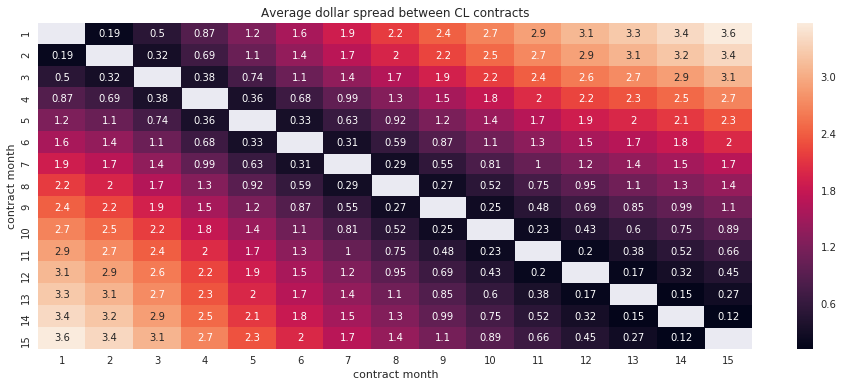

In [5]:
import seaborn as sns
ax = sns.heatmap(pct_spreads, annot=True)
ax.set_title("Average dollar spread between CL contracts")

***

## *Next Up*

Part 3: [Moonshot Strategy](Part3-Moonshot-Strategy.ipynb)